In [ ]:
import pandas as pd
import numpy as np
from keras.datasets import boston_housing
from keras import layers , models, optimizers

se usara un dataset de 404 casas con 13 variables como cantidad de alcobas etc y como su precio varia en funcion de estas caracteristicas

In [ ]:
(train_data,train_targets),(test_data,test_targets)= boston_housing.load_data()

65536/57026 [==================================] - 0s 0us/step


In [ ]:
train_data.shape

(404, 13)

In [ ]:
train_targets.shape

(404,)

In [ ]:
train_targets[0]

15.2

In [ ]:
train_data[0]

array([  1.23247,   0.     ,   8.14   ,   0.     ,   0.538  ,   6.142  ,
        91.7    ,   3.9769 ,   4.     , 307.     ,  21.     , 396.9    ,
        18.72   ])

In [ ]:
# se deben normalizar los datos 
mean= train_data.mean(axis=0)
std=train_data.std(axis=0)
train_data= (train_data-mean)/std

test_data = (test_data - mean)/std  ## se utilizan la media y la desviacion estandar de los datos de entrenamiento debido a que
                                    ## por etica no se deberia entregar al modelo informacion sobre la data con la que se va a evaluar


In [ ]:
#Definiendo el modelo
def build_model_regression(lr_var,input_data):
  model=models.Sequential()
  model.add(layers.Dense(64,activation='relu',input_shape=(input_data,)))  # son 13 las caracteristicas que definen el precio , osea la data de entrada
  model.add(layers.Dense(64,activation='relu'))
  model.add(layers.Dense(1))       # no es necesario una funcion de activacion por que la salida es un unico valor
  model.compile('rmsprop',loss='mse',metrics=['mae']) # funcion de error mse y metrica evaluadora "mean absolute error = mae"
  return model

Se hace K-Fold Cross Validation: proceso mediante el cual se divide la data de entrenamiento y   validacion con el fin de que el modelo haga entrenamiento y  validacion con diferentes sets de datos.

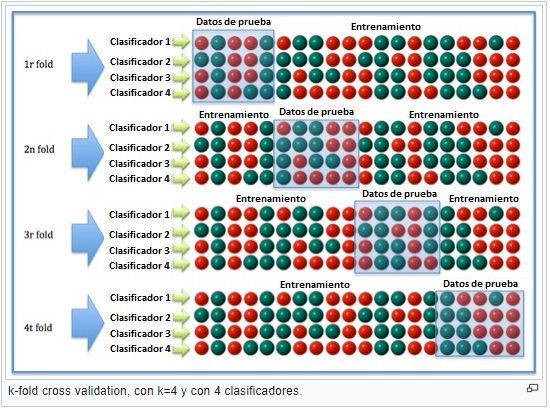

In [ ]:
k=4
num_val_samples = len(train_data)// k
num_epoch=85
all_history = []

In [ ]:
num_val_samples

101

In [ ]:
valor = 2
valor * num_val_samples

202

In [ ]:
from functools import partial
for i in range(k):
  print("Fold" , i)
  val_data=train_data[i*num_val_samples:(i+1)*num_val_samples] #recuerde que los dos puntos hacen referencias a los slices
  val_targets=train_targets[i*num_val_samples:(i+1)*num_val_samples]

  partial_train_data=np.concatenate([train_data[:i*num_val_samples],train_data[(i+1)*num_val_samples:]],axis=0)
  partial_train_targets=np.concatenate([train_targets[:i*num_val_samples],train_targets[(i+1)*num_val_samples:]],axis=0)

  model= build_model_regression(0.001,13)
  history = model.fit(partial_train_data,partial_train_targets,
                      epochs=num_epoch,batch_size=16,
                      validation_data=(val_data,val_targets),
                      verbose=0
                      )
  all_history.append(history.history['val_mae'])


Fold 0
Fold 1
Fold 2
Fold 3


In [ ]:
print(len(all_history)) ##tengo 4 slots de a 80 datos
print(len(all_history[0]))

4
85


In [ ]:
all_mae_avg=pd.DataFrame(all_history).mean(axis=0)

In [ ]:
all_mae_avg

0     19.446772
1     15.964821
2     11.808368
3      8.146782
4      6.088499
        ...    
80     2.426378
81     2.379651
82     2.414548
83     2.335324
84     2.403877
Length: 85, dtype: float64

In [ ]:
pd.DataFrame(all_history)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84
0,18.914928,15.437821,11.037968,7.206510,5.246448,4.384017,3.722250,3.463137,3.441312,3.253250,3.085930,2.973357,2.962715,2.839402,2.802936,2.624926,2.616698,2.504353,2.580971,2.438550,2.391174,2.362214,2.307743,2.312240,2.343877,2.272630,2.298878,2.252974,2.219993,2.220607,2.272812,2.143525,2.204316,2.174622,2.219372,2.314550,2.352546,2.205344,2.118671,2.209954,...,2.230632,2.114253,2.132404,2.072577,2.112578,2.053068,2.136185,2.049413,2.078544,2.107385,2.084085,2.059792,2.087737,2.150627,2.044530,2.131690,2.124639,2.059364,2.030454,2.126904,2.168091,2.131706,2.010679,2.137217,2.082406,2.202922,2.068460,2.106851,2.055379,2.004998,2.089886,2.143386,2.163782,2.098845,2.151096,2.319818,2.019446,2.198222,2.064393,2.242687
1,18.750767,15.150340,11.015398,7.661339,5.962063,5.007881,4.332622,4.038906,3.708136,3.665386,3.408808,3.272173,3.193549,3.225295,3.043308,3.059153,3.025801,2.951452,2.904545,2.985209,2.866158,2.919675,2.899273,2.949103,3.044100,2.835890,2.834725,2.872631,2.838527,2.790169,2.799264,2.889110,2.729848,2.789951,2.805997,2.717350,2.820971,2.802523,2.786117,2.789305,...,2.774564,2.771846,2.806159,2.673455,2.933140,2.751615,2.823881,2.661231,2.673966,2.766379,2.630624,2.744373,2.773925,2.605605,2.799685,2.809861,2.751865,2.840711,2.603623,2.575278,2.678770,2.673623,2.589397,2.614618,2.756492,2.661404,2.690731,2.713351,2.520530,2.703346,2.567844,2.628008,2.939275,2.651710,2.587337,2.642567,2.584664,2.758430,2.627571,2.673511
2,18.133190,14.188034,9.754009,6.599781,5.102236,4.198071,3.776796,3.541451,3.327013,3.177968,3.047159,3.048945,2.908881,2.794784,2.822295,2.746975,2.671189,2.738374,2.754876,2.658102,2.720602,2.646376,2.700572,2.597930,2.621998,2.690747,2.591960,2.609625,2.597203,2.600700,2.651580,2.535422,2.557268,2.598111,2.636580,2.571813,2.566909,2.533012,2.603363,2.477144,...,2.521331,2.424951,2.491343,2.578868,2.494633,2.551739,2.540012,2.449129,2.442015,2.412440,2.426406,2.422528,2.383900,2.494811,2.507962,2.529088,2.387370,2.441402,2.407191,2.356894,2.361060,2.389241,2.434491,2.443397,2.454979,2.455270,2.449908,2.408699,2.347770,2.326405,2.330481,2.489336,2.328324,2.319951,2.426802,2.380299,2.588039,2.393029,2.337382,2.392084
3,21.988203,19.083088,15.426098,11.119499,8.043248,6.624946,5.638583,4.960437,4.463630,4.136040,3.914613,3.730402,3.501697,3.357052,3.299972,3.147335,3.023526,2.943687,2.955446,2.812203,2.779758,2.791110,2.722400,2.632637,2.660506,2.739028,2.625481,2.602834,2.577238,2.603394,2.581458,2.464207,2.530344,2.508172,2.563294,2.458725,2.487968,2.470390,2.430676,2.463933,...,2.539758,2.489164,2.426102,2.612825,2.485114,2.360524,2.415823,2.415339,2.437303,2.377665,2.394760,2.343867,2.455044,2.349491,2.383655,2.382580,2.357823,2.330638,2.370025,2.500781,2.319701,2.346716,2.412662,2.408913,2.349612,2.309700,2.404223,2.328451,2.417452,2.393030,2.431288,2.386850,2.337814,2.368194,2.311038,2.362828,2.326455,2.308513,2.311951,2.307225


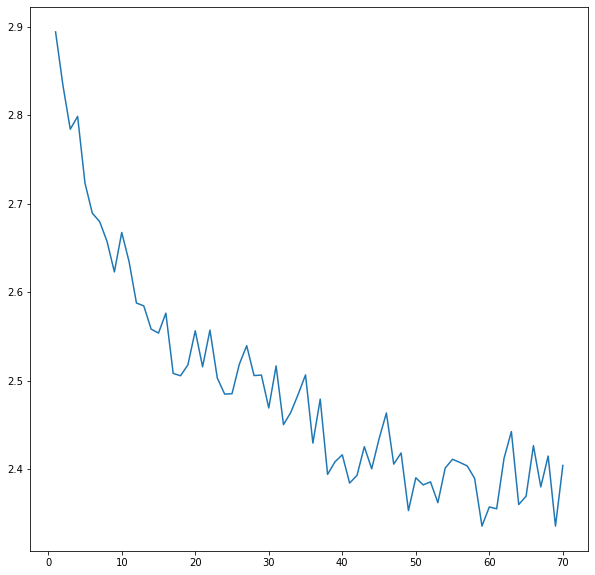

In [ ]:
import matplotlib.pyplot as plt

fig=plt.figure(figsize=(10,10))
plt.plot(range(1,len(all_mae_avg[15:])+1),all_mae_avg[15:])
plt.show()

In [ ]:
model.evaluate(test_data,test_targets)

4/4 [==============================] - 0s 3ms/step - loss: 15.2818 - mae: 2.6573


[15.281760215759277, 2.6572577953338623]

siempre es recomendable usar la Mean absolute error como metrica de desempeo del modelo